In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.preprocessing import LabelEncoder

ks = pd.read_csv('kickstarter-projects/ks-projects-201801.csv', 
                 parse_dates=['deadline', 'launched'])

ks = ks.query('state != "live"')

ks = ks.assign(outcome=(ks['state'] == 'successful').astype(int))

ks = ks.assign(hour=ks.launched.dt.hour,
               day=ks.launched.dt.day,
               month=ks.launched.dt.month,
               year=ks.launched.dt.year)

cat_features = ['category', 'currency', 'country']
encoder = LabelEncoder()
encoded = ks[cat_features].apply(encoder.fit_transform)
data_cols = ['goal', 'hour', 'day', 'month', 'year', 'outcome']
baseline_data = ks[data_cols].join(encoded)

In [2]:
interactions = ks['category'] + '_' + ks['country']
print(interactions.head(10))

0            Poetry_GB
1    Narrative Film_US
2    Narrative Film_US
3             Music_US
4      Film & Video_US
5       Restaurants_US
6              Food_US
7            Drinks_US
8    Product Design_US
9       Documentary_US
dtype: object


In [3]:
label_encoder = LabelEncoder()
data_interaction = baseline_data.assign(category_country=label_encoder.fit_transform(interactions))
data_interaction.head(10)

,goal,hour,day,month,year,outcome,category,currency,country,category_country
0,1000.0,12,11,8,2015,0,108,5,9,1900
1,30000.0,4,2,9,2017,0,93,13,22,1630
2,45000.0,0,12,1,2013,0,93,13,22,1630
3,5000.0,3,17,3,2012,0,90,13,22,1595
4,19500.0,8,4,7,2015,0,55,13,22,979
5,50000.0,13,26,2,2016,1,123,13,22,2150
6,1000.0,18,1,12,2014,1,58,13,22,1054
7,25000.0,20,1,2,2016,0,41,13,22,739
8,125000.0,18,24,4,2014,0,113,13,22,2003
9,65000.0,21,11,7,2014,0,39,13,22,699


In [4]:
launched = pd.Series(ks.index, index=ks.launched, name='count_7_days').sort_index()
launched.head(20)

launched
1970-01-01 01:00:00     94579
1970-01-01 01:00:00    319002
1970-01-01 01:00:00    247913
1970-01-01 01:00:00     48147
1970-01-01 01:00:00     75397
1970-01-01 01:00:00      2842
1970-01-01 01:00:00    273779
2009-04-21 21:02:48    169268
2009-04-23 00:07:53    322000
2009-04-24 21:52:03    138572
2009-04-25 17:36:21    325391
2009-04-27 14:10:39    122662
2009-04-28 13:55:41    213711
2009-04-29 02:04:21    345606
2009-04-29 02:58:50    235255
2009-04-29 04:37:37     98954
2009-04-29 05:26:32    342226
2009-04-29 06:43:44    275091
2009-04-29 13:52:03    284115
2009-04-29 22:08:13     32898
Name: count_7_days, dtype: int64

In [5]:
count_7_days = launched.rolling('7d').count() - 1
count_7_days

launched
1970-01-01 01:00:00     0.0
1970-01-01 01:00:00     1.0
1970-01-01 01:00:00     2.0
1970-01-01 01:00:00     3.0
1970-01-01 01:00:00     4.0
1970-01-01 01:00:00     5.0
1970-01-01 01:00:00     6.0
2009-04-21 21:02:48     0.0
2009-04-23 00:07:53     1.0
2009-04-24 21:52:03     2.0
2009-04-25 17:36:21     3.0
2009-04-27 14:10:39     4.0
2009-04-28 13:55:41     5.0
2009-04-29 02:04:21     5.0
2009-04-29 02:58:50     6.0
2009-04-29 04:37:37     7.0
2009-04-29 05:26:32     8.0
2009-04-29 06:43:44     9.0
2009-04-29 13:52:03    10.0
2009-04-29 22:08:13    11.0
2009-04-29 23:11:15    12.0
2009-04-30 01:32:55    12.0
2009-04-30 07:14:06    13.0
2009-04-30 22:10:30    14.0
2009-04-30 22:22:43    15.0
2009-04-30 22:23:22    16.0
2009-05-01 05:06:19    17.0
2009-05-01 14:22:21    18.0
2009-05-01 17:44:25    19.0
2009-05-01 17:51:24    20.0
                       ... 
2017-12-20 23:36:58    68.0
2017-12-21 00:35:57    69.0
2017-12-21 18:19:27    60.0
2017-12-22 06:58:39    52.0
2017-12-22 

Text(0.5, 1.0, 'Competitions in the last 7 days')

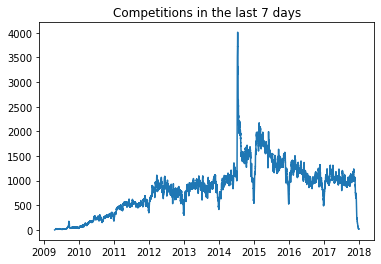

In [7]:
plt.plot(count_7_days[7:])
plt.title('Competitions in the last 7 days')

In [8]:
count_7_days.index = launched.values
count_7_days = count_7_days.reindex(ks.index)
count_7_days.head(10)

0    1409.0
1     957.0
2     739.0
3     907.0
4    1429.0
5    1284.0
6    1119.0
7    1391.0
8    1043.0
9    3199.0
Name: count_7_days, dtype: float64

In [9]:
baseline_data.join(count_7_days).head(10)

,goal,hour,day,month,year,outcome,category,currency,country,count_7_days
0,1000.0,12,11,8,2015,0,108,5,9,1409.0
1,30000.0,4,2,9,2017,0,93,13,22,957.0
2,45000.0,0,12,1,2013,0,93,13,22,739.0
3,5000.0,3,17,3,2012,0,90,13,22,907.0
4,19500.0,8,4,7,2015,0,55,13,22,1429.0
5,50000.0,13,26,2,2016,1,123,13,22,1284.0
6,1000.0,18,1,12,2014,1,58,13,22,1119.0
7,25000.0,20,1,2,2016,0,41,13,22,1391.0
8,125000.0,18,24,4,2014,0,113,13,22,1043.0
9,65000.0,21,11,7,2014,0,39,13,22,3199.0


In [12]:
def time_since_last_project(series):
    return series.diff().dt.total_seconds() / 3600.

df = ks[['category', 'launched']].sort_values('launched')
timedeltas = df.groupby('category').transform(time_since_last_project)
timedeltas.head(20)

,launched
94579,NaN
319002,NaN
247913,NaN
48147,NaN
75397,NaN
2842,0.000000
273779,NaN
169268,NaN
322000,NaN
138572,NaN


In [13]:
timedeltas = timedeltas.fillna(timedeltas.median()).reindex(baseline_data.index)
timedeltas.head(20)

,launched
0,18.606111
1,5.592778
2,1.313611
3,0.635000
4,16.661389
5,2.629722
6,0.367500
7,12.286111
8,14.243611
9,0.174722


Text(0.5, 1.0, 'Goal')

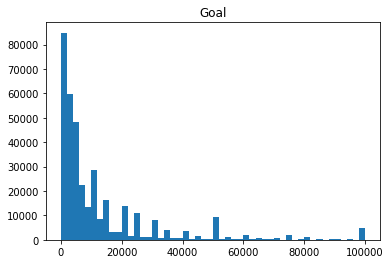

In [14]:
plt.hist(ks.goal, range=(0, 100000), bins=50)
plt.title('Goal')

Text(0.5, 1.0, 'Sqrt(Goal)')

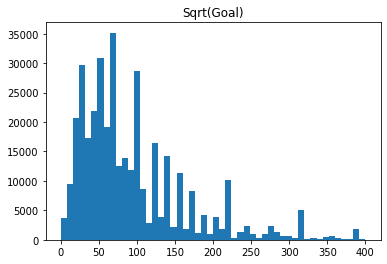

In [15]:
plt.hist(np.sqrt(ks.goal), range=(0,400), bins=50)
plt.title('Sqrt(Goal)')

Text(0.5, 1.0, 'Log(Goal)')

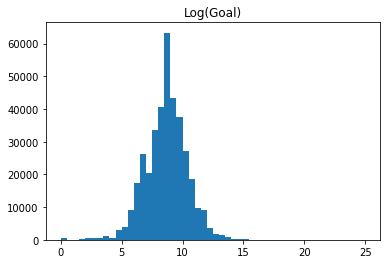

In [16]:
plt.hist(np.log(ks.goal), range=(0, 25), bins=50)
plt.title('Log(Goal)')